## 작업환경세팅

In [ ]:
# import sys
# sys.path.append('C:/Users/Home/Desktop/IL-NIQE-1.0.1/')
 
# from ILNIQE import calculate_ilniqe

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm

In [2]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -qq '/content/drive/MyDrive/기업연계프로젝트/gaussian.zip'

In [ ]:
!unzip -qq "/content/drive/MyDrive/기업연계프로젝트/lens.zip"

In [ ]:
!unzip -qq "/content/drive/MyDrive/기업연계프로젝트/motion.zip"

In [ ]:
!unzip -qq "/content/drive/MyDrive/기업연계프로젝트/crop_img.zip"

In [5]:
!unzip -qq "/content/drive/MyDrive/기업연계프로젝트/testset_crop.zip"

In [5]:
# img=cv2.imread(img_path)
# cv2.imshow('rgb_image', img)
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

from scipy.stats import spearmanr, pearsonr

In [ ]:
cv2.cuda.getCudaEnabledDeviceCount()

0

In [4]:
!pwd

/content


In [5]:
%cd /content/drive/MyDrive/24team/

/content/drive/MyDrive/24team


In [6]:
!pwd

/content/drive/MyDrive/24team


In [7]:
!ls


 brisque-0.0.13         NRIQA_df_ffhq_gau.csv
 CNNIQA		        NRIQA_df_ffhq_lens.csv
 content	        NRIQA_df_ffhq_motion.csv
 crop_image	        NRIQA_df_last.csv
 DNNforNRandFR	       'NR_meric_test_ffhq(some).ipynb'
 ffhq-dataset-v2.json  'NR_meric_test_kadid(some).ipynb'
 FFHQ_ga	       'NR_meric_test_kadid(some).ipynb의 사본'
 FRIQA_TEST.ipynb       NR_meric_testset.ipynb
 hyperIQA	        NR_testset_hq.csv
 IL_NIQE	        NR_testset_middle.csv
 images1024x1024        python-cpbd
 in-the-wild-images    'WaDIQaM_DIQaM(kadid).csv'
 kadid10k	        WaDIQaM_gau.csv
 musiq		        WaDIQaM_lens.csv
 niqemaster	        WaDIQaM_motion.csv


In [8]:
path = "/content/low_q/"

In [9]:
# gaussian_list=os.listdir(path)
# lens_list=os.listdir(path)
low_q=os.listdir(path)

In [10]:
low_q_list = [i for i in low_q if "jpg" in i] 

In [11]:
len(low_q_list)

333

## NR_METRIC

ILNIQE

In [ ]:

def ILNIQE(img_path):
    from IL_NIQE.ILNIQE import calculate_ilniqe
    import cv2
    import warnings
    import time
    img = cv2.imread(img_path)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', category=RuntimeWarning)
        time_start = time.time()

        niqe_result = calculate_ilniqe(img, 0, input_order='HWC', resize=True, version='python')

        time_used = time.time() - time_start
    return niqe_result
    #print(f'\t time used in sec: {time_used:.4f}')

In [ ]:
dist_ILNIQE_num = []
#dist_MOS_num = []

for i in tqdm(range(900,1215)):
    dist = os.path.join(path, mos.iloc[i, 0])
    mos_num = mos.iloc[i, 2]
    dist_ILNIQE_num.append((round(ILNIQE(dist),3)))
    #dist_MOS_num.append(mos_num)

In [ ]:
len(dist_ILNIQE_num)

In [ ]:
# NRIQA_df_concat = pd.read_csv("/content/drive/MyDrive/24team/NRIQA_df_concat.csv", index_col=0)

In [ ]:
# NRIQA_df_concat.loc[900:,'ILNIQE']=dist_ILNIQE_num NAN값 수정하기

In [ ]:
# NRIQA_df_concat.to_csv("NRIQA_df_concat.csv", mode='w')

**BRISQE**

In [14]:
pip install brisque

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 36.1 MB/s 
     |████████████████████████████████| 170 kB 59.1 MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp37-cp37m-linux_x86_64.whl size=233359 sha256=2f4cd71d5072a91d19beff627192d1e6979911d9cf9bb03a2b050beb1de4a8d4
  Stored in directory: /root/.cache/pip/wheels/cd/e8/1e/bf95cf256e4d3ffc94289ab508c49d48e34c98220af63e3513
Successfully built libsvm


In [54]:
def BRISQUE(img_path):
    from brisque import BRISQUE

    obj = BRISQUE(img_path, url=True)
    return obj.score()


In [55]:
def BRISQUE(img_path):
  from brisque import BRISQUE

  obj = BRISQUE(url=False)
  obj.score(img_path)

**NIQE**

In [12]:
def NIQE(img_path):
    import numpy as np
    from PIL import Image
    from niqemaster import niqemain
    ref = np.array(Image.open(img_path).convert('LA'))[:,:,0] # ref
    #dis = np.array(Image.open('C:/Users/Home/Desktop/IQA/niqemaster/test_imgs/bikes_distorted.bmp').convert('LA'))[:,:,0] # dis

    return niqemain.niqemain(ref)
    #print('NIQE of dis bikes image is: %0.3f'% niqemain.niqemain(dis))

In [ ]:
# print(dir(niqemain))

CNNIQA

In [13]:
def CNNIQA(img_path, models='/content/drive/MyDrive/24team/CNNIQA/models/CNNIQA-LIVE'):
    from CNNIQA.test_demo import CNNIQAnet
    from CNNIQA.IQADataset import NonOverlappingCropPatches
    import torch
    from PIL import Image
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CNNIQAnet(ker_size=7,
                      n_kers=50,
                      n1_nodes=800,
                      n2_nodes=800).to(device)

    model.load_state_dict(torch.load(models, map_location=torch.device('cpu')))

    im = Image.open(img_path).convert('L')
    patches = NonOverlappingCropPatches(im, 32, 32)

    model.eval()
    with torch.no_grad():
        patch_scores = model(torch.stack(patches).to(device))
        return patch_scores.mean().item()

In [ ]:
CNNIQA(img_path) 

In [ ]:
#cpbd : CPBD is a perceptual-based no-reference objective image sharpness metric based on the cumulative probability of blur detection developed at the Image, Video and Usability Laboratory of Arizona State University.

CPBD

In [17]:
pip install cpbd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for cpbd: filename=cpbd-1.0.7-py3-none-any.whl size=7493 sha256=8c6cee1ca85556c1c3d9f9ef7c63d276cd41a3d3ae671742785c1e41d4413e31
  Stored in directory: /root/.cache/pip/wheels/83/c7/f0/d618c0a63b4e8b62f6e7346b3e7b3c0465ffe77b3b31e8e058
Successfully built cpbd


In [14]:
def CPBD(img_path):
    from imageio import imread
    import cv2
    import cpbd
    # import imageio.v3 as iio
    # input_image = iio.imread(img_path)
    input_image = cv2.imread(img_path)
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    return cpbd.compute(input_image)
    

WaDIQaM_DIQaM

In [19]:
pip install chainer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 37.5 MB/s 
  Created wheel for chainer: filename=chainer-7.8.1-py3-none-any.whl size=967740 sha256=ab7fa9cc6ec18f364ccfc34bcf258836a4f8893d436b1fcec96270cb5e405157
  Stored in directory: /root/.cache/pip/wheels/c8/6a/6f/fd563166cc597e5206e375ea074ea836e5db5dd58421215672
Successfully built chainer


In [20]:
pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from chainer import cuda
import numpy as np
import argparse

import chainer
import six
from chainer import computational_graph
from chainer import cuda
from chainer import optimizers
from chainer import serializers
from patchify import patchify
import cv2
# from sklearn.feature_extraction.image import extract_patches_2d

In [22]:
def WaDIQaM_DIQaM(img_path, models):
  from DNNforNRandFR.nr_model import Model
  if models == 'w'  :
    model = Model(top='weighted') #weighted , patchwise
    cuda.cudnn_enabled = True
    cuda.check_cuda_available()
    xp = cuda.cupy
    # serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_patchwise.model', model)
    serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_weighted.model', model)
    model.to_gpu() 
    # nr_live_patchwise.model
    # nr_live_weighted.model
    # nr_tid_patchwise.model
    # nr_tid_weighted.model
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    patches = patchify(img, (32,32,3), 32)
    X = np.transpose(patches.reshape((-1, 32, 32, 3)), (0, 3, 1, 2))



  
  elif models == 'p'  : 
    model = Model(top='patchwise') #weighted , patchwise
    cuda.cudnn_enabled = True
    cuda.check_cuda_available()
    xp = cuda.cupy
    serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_patchwise.model', model)
    # serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_weighted.model', model)
    model.to_gpu() 
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    patches = patchify(img, (32,32,3), 32)
    X = np.transpose(patches.reshape((-1, 32, 32, 3)), (0, 3, 1, 2))
  

  y = []
  weights = []
  batchsize = min(2000, X.shape[0])
  t = xp.zeros((1, 1), np.float32)
  for i in six.moves.range(0, X.shape[0], batchsize):
      X_batch = X[i:i + batchsize]
      X_batch = xp.array(X_batch.astype(np.float32))

      model.forward(X_batch, t, False, X_batch.shape[0])

      y.append(xp.asnumpy(model.y[0].data).reshape((-1,)))
      weights.append(xp.asnumpy(model.a[0].data).reshape((-1,)))

  y = np.concatenate(y)
  weights = np.concatenate(weights)

  return ("%f" %  (np.sum(y*weights)/np.sum(weights)))



In [ ]:
WaDIQaM_DIQaM(img_path, "P")


HYPER

In [16]:
def pil_loader(path):
    import torch
    import torchvision
    from hyperIQA import models
    from PIL import Image
    import numpy as np  
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

In [17]:
def hyperIQA(img_path):
    import torch
    import torchvision
    from hyperIQA import models
    from PIL import Image
    import numpy as np
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    #device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model_hyper = models.HyperNet(16, 112, 224, 112, 56, 28, 14, 7).to(device)
    model_hyper.train(False)
    # load our pre-trained model on the koniq-10k dataset
    model_hyper.load_state_dict((torch.load('/content/drive/MyDrive/24team/hyperIQA/pretrained/koniq_pretrained.pkl')))#, map_location=device)))

    transforms = torchvision.transforms.Compose([
                        torchvision.transforms.Resize((512, 384)),
                        torchvision.transforms.RandomCrop(size=224),
                        torchvision.transforms.ToTensor(),
                        torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                                        std=(0.229, 0.224, 0.225))])

    # random crop 10 patches and calculate mean quality score
    pred_scores = []
    for i in range(10):
        img = pil_loader(img_path)
        img = transforms(img)
        img = torch.tensor(img.cuda()).unsqueeze(0)
        paras = model_hyper(img)  # 'paras' contains the network weights conveyed to target network

        # Building target network
        model_target = models.TargetNet(paras).to(device)
        for param in model_target.parameters():
            param.requires_grad = False

        # Quality prediction
        pred = model_target(paras['target_in_vec'])  # 'paras['target_in_vec']' is the input to target net
        pred_scores.append(float(pred.item()))
    score = np.mean(pred_scores)
    # quality score ranges from 0-100, a higher score indicates a better quality
    # print('Predicted quality score: %.2f' % score)
    return score

# 새 섹션

## NR_METRIC ROCC LCC

In [ ]:
#-------------------------------test-----------------------------

In [25]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm

In [ ]:
# ILNIQE

In [ ]:
dist_ILNIQE_num = []
dist_MOS_num = []


for i in tqdm(range(len(high_q_list))):
    dist = os.path.join(path, high_q_list[i])
    dist_ILNIQE_num.append((round(ILNIQE(dist),3)))

In [ ]:
spearmanr(dist_ILNIQE_num, dist_MOS_num)

SpearmanrResult(correlation=-0.6498864196927844, pvalue=2.6219337773225333e-27)

In [ ]:
pearsonr(dist_ILNIQE_num, dist_MOS_num)

(-0.6177624941035645, 4.034105907442601e-24)

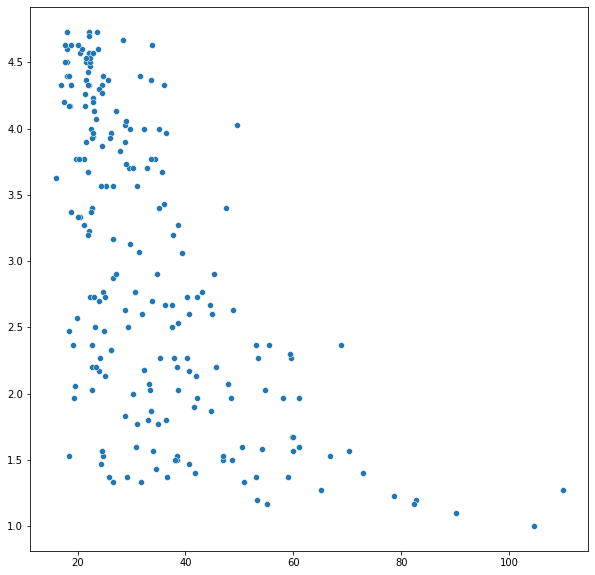

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = dist_ILNIQE_num, y = dist_MOS_num)
plt.show()

In [ ]:
# CNNIQA with spearmanr, pearsonr

In [19]:
dist_CNNIQA_num = []
dist_MOS_num = []


for i in tqdm(range(len(low_q_list))):
    dist = os.path.join(path, low_q_list[i])
    
    dist_CNNIQA_num.append((round(CNNIQA(dist),3)))
    

100%|██████████| 333/333 [00:21<00:00, 15.81it/s]


In [ ]:
spearmanr(dist_CNNIQA_num, dist_MOS_num)

SpearmanrResult(correlation=-0.7640065036239475, pvalue=4.393391634995857e-233)

In [ ]:
pearsonr(dist_CNNIQA_num, dist_MOS_num)

(-0.7520504169580238, 7.512818490253071e-222)

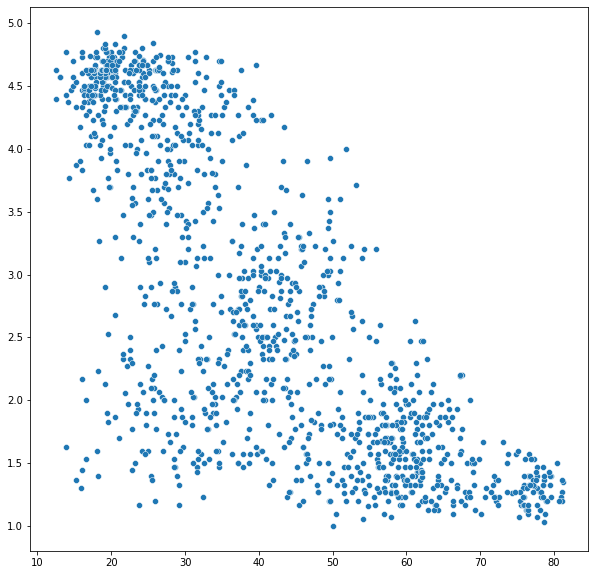

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = dist_CNNIQA_num, y = dist_MOS_num)
plt.show()

In [ ]:
# BRISQUE with spearmanr, pearsonr

In [42]:
 from google.colab.patches import cv2_imshow

  0%|          | 0/1 [00:00<?, ?it/s]

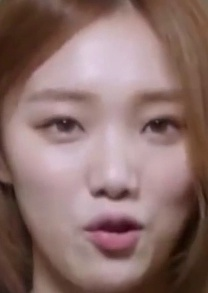

100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


In [47]:
for i in tqdm(range(1)):
    dist = os.path.join(path, middle_q_list[i])
    dist=cv2.imread(dist)
    dist = cv2.cvtColor(dist, cv2.COLOR_BGR2RGB)
    cv2_imshow(dist)

In [53]:


dist_BRISQUE_num = []
dist_MOS_num = []



for i in tqdm(range(len(middle_q_list))):
    dist = os.path.join(path, middle_q_list[i])

    dist_BRISQUE_num.append((round(BRISQUE(dist),3)))

  0%|          | 0/333 [00:00<?, ?it/s]


TypeError: ignored

In [ ]:
spearmanr(dist_BRISQUE_num, dist_MOS_num)

SpearmanrResult(correlation=-0.7951079389722746, pvalue=1.0120631512118097e-265)

In [ ]:
pearsonr(dist_BRISQUE_num, dist_MOS_num)

(-0.7801015108025544, 2.630774504424098e-249)

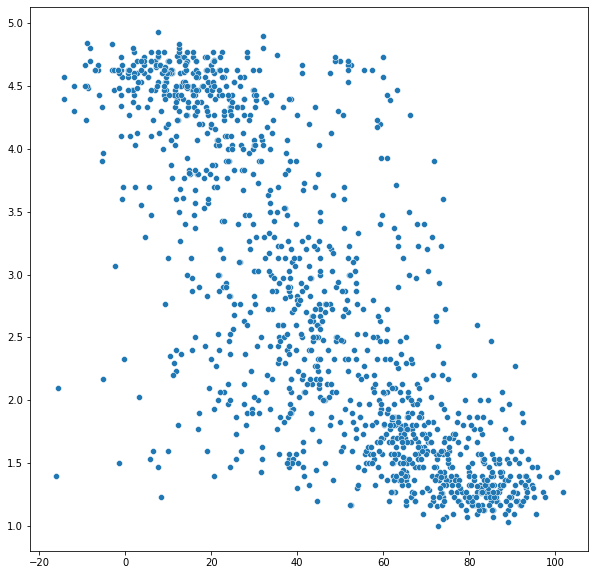

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = dist_BRISQUE_num, y = dist_MOS_num)
plt.show()

In [ ]:
#NIQE with spearmanr, pearsonr

In [20]:
dist_NIQE_num = []
dist_MOS_num = []


for i in tqdm(range(len(low_q_list))):
    dist = os.path.join(path, low_q_list[i])
    
    dist_NIQE_num.append((round(NIQE(dist),3)))

  4%|▍         | 13/333 [00:00<00:17, 17.91it/s]


AssertionError: ignored

In [ ]:
spearmanr(dist_NIQE_num, dist_MOS_num)

SpearmanrResult(correlation=-0.46089220267349873, pvalue=6.2688181178290745e-65)

In [ ]:
pearsonr(dist_NIQE_num, dist_MOS_num)

(-0.42161321982013855, 1.5161897646821445e-53)

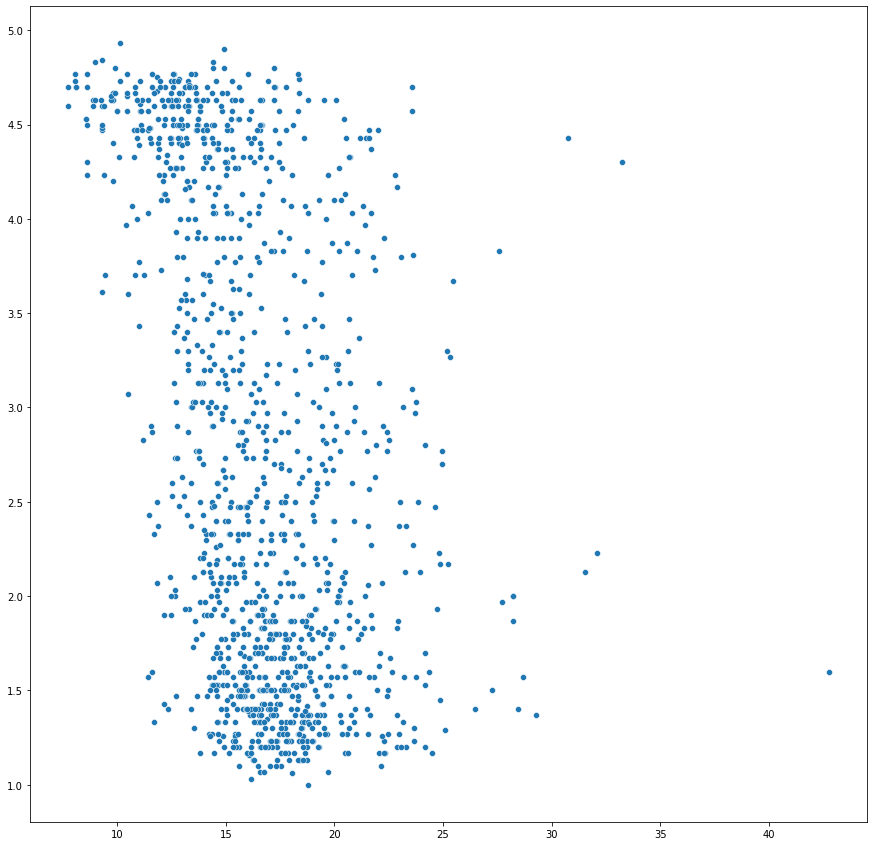

In [ ]:
plt.figure(figsize = (15,15))
sns.scatterplot(x = dist_NIQE_num, y = dist_MOS_num)
plt.show()

In [ ]:
#CPBD with spearmanr, pearsonr

In [21]:
dist_CPBD_num = []
dist_MOS_num = []



for i in tqdm(range(len(low_q_list))):
    dist = os.path.join(path, low_q_list[i])
    
    dist_CPBD_num.append((round(CPBD(dist),3)))

100%|██████████| 333/333 [01:10<00:00,  4.70it/s]


In [ ]:
spearmanr(dist_CPBD_num, dist_MOS_num)

SpearmanrResult(correlation=0.02233252839521375, pvalue=0.11434745760400686)

In [ ]:
pearsonr(dist_CPBD_num, dist_MOS_num)

(0.13763746763172863, 1.419442370699873e-22)

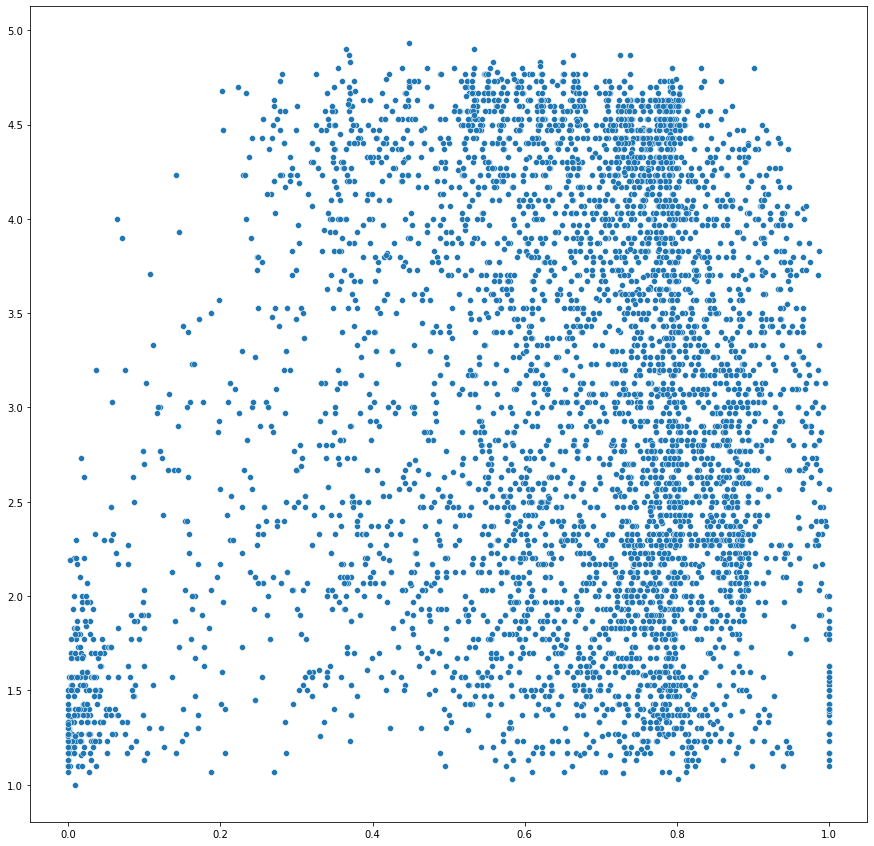

In [ ]:
plt.figure(figsize = (15,15))
sns.scatterplot(x = dist_CPBD_num, y = dist_MOS_num)
plt.show()

In [ ]:
len(dist_CPBD_num)

5000

WaDIQaM_DIQaM

In [22]:
pip install chainer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from chainer import cuda
import numpy as np
import argparse

import chainer
import six
from chainer import computational_graph
from chainer import cuda
from chainer import optimizers
from chainer import serializers
from patchify import patchify
import cv2

In [25]:
def WaDIQaM_DIQaM(img_path, models):
  from DNNforNRandFR.nr_model import Model
  if models == 'w'  :
    model = Model(top='weighted') #weighted , patchwise
    cuda.cudnn_enabled = True
    cuda.check_cuda_available()
    xp = cuda.cupy
    # serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_patchwise.model', model)
    serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_weighted.model', model)
    model.to_gpu() 
    # nr_live_patchwise.model
    # nr_live_weighted.model
    # nr_tid_patchwise.model
    # nr_tid_weighted.model
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    patches = patchify(img, (32,32,3), 32)
    X = np.transpose(patches.reshape((-1, 32, 32, 3)), (0, 3, 1, 2))



  
  elif models == 'p'  : 
    model = Model(top='patchwise') #weighted , patchwise
    cuda.cudnn_enabled = True
    cuda.check_cuda_available()
    xp = cuda.cupy
    serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_patchwise.model', model)
    # serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_weighted.model', model)
    model.to_gpu() 
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    patches = patchify(img, (32,32,3), 32)
    X = np.transpose(patches.reshape((-1, 32, 32, 3)), (0, 3, 1, 2))
  

  y = []
  weights = []
  batchsize = min(2000, X.shape[0])
  t = xp.zeros((1, 1), np.float32)
  for i in six.moves.range(0, X.shape[0], batchsize):
      X_batch = X[i:i + batchsize]
      X_batch = xp.array(X_batch.astype(np.float32))

      model.forward(X_batch, t, False, X_batch.shape[0])

      y.append(xp.asnumpy(model.y[0].data).reshape((-1,)))
      weights.append(xp.asnumpy(model.a[0].data).reshape((-1,)))

  y = np.concatenate(y)
  weights = np.concatenate(weights)

  return round(np.sum(y*weights)/np.sum(weights),3)



In [ ]:
WaDIQaM_DIQaM(img_path, 'w')

'15.586133'

In [ ]:
# weight 방식으로 해보니 점수가 좋지 못함 LIVE dataset

In [26]:
dist_WaDIQaM_DIQaM_num = []
dist_MOS_num = []


for i in tqdm(range(len(low_q_list))):
    dist = os.path.join(path, low_q_list[i])
    
    dist_WaDIQaM_DIQaM_num.append((round(WaDIQaM_DIQaM(dist,'w'),3)))

  0%|          | 0/333 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/chainer/functions/connection/convolution_2d.py:298: PerformanceWarning: The best algo of conv fwd might not be selected due to lack of workspace size (8388608)
  d_layout=cudnn_x_layout, w_layout=cudnn_w_layout)
100%|██████████| 333/333 [02:42<00:00,  2.04it/s]


In [ ]:
spearmanr(dist_WaDIQaM_DIQaM_num, dist_MOS_num)

SpearmanrResult(correlation=-0.5951318696064425, pvalue=2.609061513765546e-117)

In [ ]:
pearsonr(dist_WaDIQaM_DIQaM_num, dist_MOS_num)

(-0.5765188036139438, 1.50601689580351e-108)

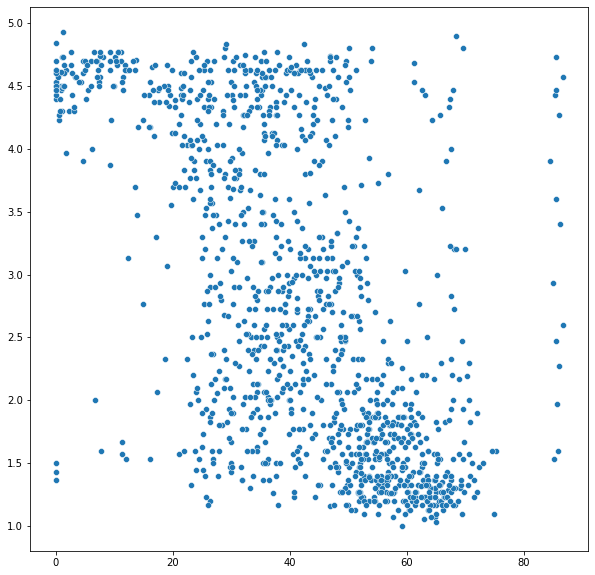

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = dist_WaDIQaM_DIQaM_num, y = dist_MOS_num)
plt.show()

In [ ]:
# 이번에는 patch 방식으로 해보자. LIVE dataset

In [27]:
dist_DIQaM_DIQaM_num = []
dist_MOS_num = []


for i in tqdm(range(len(low_q_list))):
    dist = os.path.join(path, low_q_list[i])
    
    dist_DIQaM_DIQaM_num.append((round(WaDIQaM_DIQaM(dist,'p'),3)))

100%|██████████| 333/333 [02:31<00:00,  2.19it/s]


In [ ]:
spearmanr(dist_DIQaM_DIQaM_num, dist_MOS_num)

SpearmanrResult(correlation=-0.7118149675170315, pvalue=2.4517914246891213e-188)

In [ ]:
pearsonr(dist_DIQaM_DIQaM_num, dist_MOS_num)

(-0.704601751042318, 6.213313335818753e-183)

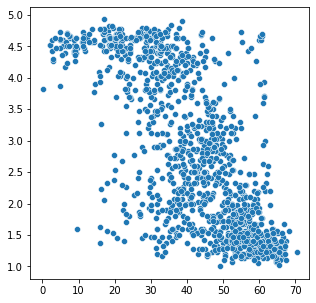

In [ ]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = dist_DIQaM_DIQaM_num, y = dist_MOS_num)
plt.show()

In [ ]:
# TDI dataset 으로 해보자

In [28]:
def WaDIQaM_DIQaM(img_path, models):
  from DNNforNRandFR.nr_model import Model
  if models == 'w'  :
    model = Model(top='weighted') #weighted , patchwise
    cuda.cudnn_enabled = True
    cuda.check_cuda_available()
    xp = cuda.cupy
    # serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_patchwise.model', model)
    # serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_weighted.model', model)
    serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_tid_weighted.model', model)
    model.to_gpu() 
    # nr_live_patchwise.model
    # nr_live_weighted.model
    # nr_tid_patchwise.model
    # nr_tid_weighted.model
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    patches = patchify(img, (32,32,3), 32)
    X = np.transpose(patches.reshape((-1, 32, 32, 3)), (0, 3, 1, 2))



  
  elif models == 'p'  : 
    model = Model(top='patchwise') #weighted , patchwise
    cuda.cudnn_enabled = True
    cuda.check_cuda_available()
    xp = cuda.cupy
    serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_tid_patchwise.model', model)
    # serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_patchwise.model', model)
    # serializers.load_hdf5('/content/drive/MyDrive/24team/DNNforNRandFR/models/nr_live_weighted.model', model)
    model.to_gpu() 
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    patches = patchify(img, (32,32,3), 32)
    X = np.transpose(patches.reshape((-1, 32, 32, 3)), (0, 3, 1, 2))
  

  y = []
  weights = []
  batchsize = min(2000, X.shape[0])
  t = xp.zeros((1, 1), np.float32)
  for i in six.moves.range(0, X.shape[0], batchsize):
      X_batch = X[i:i + batchsize]
      X_batch = xp.array(X_batch.astype(np.float32))

      model.forward(X_batch, t, False, X_batch.shape[0])

      y.append(xp.asnumpy(model.y[0].data).reshape((-1,)))
      weights.append(xp.asnumpy(model.a[0].data).reshape((-1,)))

  y = np.concatenate(y)
  weights = np.concatenate(weights)

  return round(np.sum(y*weights)/np.sum(weights),3)


In [29]:
dist_WaDIQaM_DIQaM_num_tdi = []
dist_MOS_num = []


for i in tqdm(range(len(low_q_list))):
    dist = os.path.join(path, low_q_list[i])
    
    dist_WaDIQaM_DIQaM_num_tdi.append((round(WaDIQaM_DIQaM(dist,'w'),3)))

100%|██████████| 333/333 [02:36<00:00,  2.12it/s]


In [ ]:
spearmanr(dist_WaDIQaM_DIQaM_num_tdi, dist_MOS_num)

SpearmanrResult(correlation=-0.7159718291312673, pvalue=1.580493494174746e-191)

In [ ]:
pearsonr(dist_WaDIQaM_DIQaM_num_tdi, dist_MOS_num)

(-0.6957793284285988, 1.5259155368897792e-176)

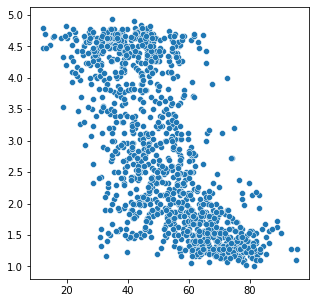

In [ ]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = dist_WaDIQaM_DIQaM_num_tdi, y = dist_MOS_num)
plt.show()

In [ ]:
# patch 로 TDI dataset

In [30]:
dist_DIQaM_DIQaM_num_tdi = []
dist_MOS_num = []


for i in tqdm(range(len(low_q_list))):
    dist = os.path.join(path, low_q_list[i])
    
    dist_DIQaM_DIQaM_num_tdi.append((round(WaDIQaM_DIQaM(dist,'p'),3)))

100%|██████████| 333/333 [02:32<00:00,  2.19it/s]


In [ ]:
spearmanr(dist_DIQaM_DIQaM_num_tdi, dist_MOS_num)

SpearmanrResult(correlation=-0.5606237323878469, pvalue=1.683564955977567e-101)

In [ ]:
pearsonr(dist_DIQaM_DIQaM_num_tdi, dist_MOS_num)

(-0.5527579437322229, 3.759371299096539e-98)

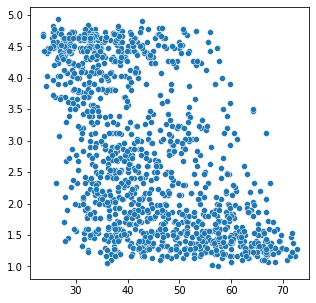

In [ ]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = dist_DIQaM_DIQaM_num_tdi, y = dist_MOS_num)
plt.show()

# 새 섹션

hyperIQA

In [31]:
dist_hyper_num = []
# dist_MOS_num = []


for i in tqdm(range(len(low_q_list))):
    dist = os.path.join(path, low_q_list[i])
    
    dist_hyper_num.append((round(hyperIQA(dist),3)))

100%|██████████| 333/333 [05:55<00:00,  1.07s/it]


In [32]:
NR_testset=pd.DataFrame({'CPBD' : dist_CPBD_num,
              'CNNIQA' :dist_CNNIQA_num,
              'HYPER':dist_hyper_num,
              'WaDIQaM_LIVE':dist_WaDIQaM_DIQaM_num,
              'DIQaM_LIVE':dist_DIQaM_DIQaM_num,
              'WaDIQaM_TID':dist_WaDIQaM_DIQaM_num_tdi,
              'DIQaM_TID':dist_DIQaM_DIQaM_num_tdi})

In [34]:
NR_testset

,CPBD,CNNIQA,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID
0,0.019,46.011,49.463,56.580002,40.391998,83.010002,46.521999
1,0.091,39.172,49.340,40.507999,39.347000,84.975998,45.735001
2,0.369,52.909,15.257,41.952999,38.728001,56.124001,56.619999
3,0.144,20.014,41.932,46.759998,30.441000,28.988001,41.182999
4,0.098,21.674,41.766,85.268997,33.676998,63.743999,36.139000
...,...,...,...,...,...,...,...
328,0.138,21.051,43.257,33.068001,24.834000,35.243999,38.987000
329,0.104,35.111,49.348,38.789001,39.212002,86.419998,48.851002
330,0.060,40.958,49.014,43.410999,39.458000,88.952003,48.691002
331,0.522,45.765,24.702,41.598000,35.230000,53.967999,47.591999


In [33]:
NR_testset.to_csv("NR_testset_low.csv", index=False)

In [ ]:
dist_CPBD_num
dist_WaDIQaM_DIQaM_num
dist_DIQaM_DIQaM_num
dist_WaDIQaM_DIQaM_num_tdi
dist_DIQaM_DIQaM_num_tdi

In [ ]:
NRIQA_df_ffhq_motion=pd.read_csv("/content/drive/MyDrive/24team/NRIQA_df_ffhq_motion.csv")

In [ ]:
NRIQA_df_ffhq_motion

,CPBD,NIQE,BRISQUE,CNNIQA,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID
0,0.029,14.459,47.900,26.844,63.264,35.141,32.055,48.508,39.217
1,0.042,16.311,40.430,26.213,48.792,38.455,41.365,57.903,41.035
2,0.009,14.603,81.307,43.614,64.807,41.718,38.355,62.902,52.334
3,0.120,14.315,35.746,24.239,56.972,37.943,42.321,66.473,54.798
4,0.284,18.209,62.750,24.184,46.183,30.373,38.287,52.899,42.960
...,...,...,...,...,...,...,...,...,...
5995,0.107,15.047,42.040,31.115,36.929,33.049,34.518,50.979,35.262
5996,0.120,15.777,35.979,44.116,55.365,25.978,29.403,43.254,39.388
5997,0.267,16.676,52.026,28.585,55.797,27.556,31.386,34.141,39.331
5998,0.584,15.056,13.213,22.878,60.382,29.265,26.997,50.819,33.209


In [ ]:
NRIQA_df_ffhq_motion['HYPER']=dist_hyper_num

In [ ]:
NRIQA_df_ffhq_motion=NRIQA_df_ffhq_motion[['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE',
       'WaDIQaM_TID', 'DIQaM_TID']]

In [ ]:
NRIQA_df_ffhq_motion.to_csv("NRIQA_df_ffhq_motion.csv", index=False)

## 데이터 

In [ ]:
NRIQA_df_last=pd.read_csv("/content/drive/MyDrive/24team/NRIQA_df_last.csv")

In [ ]:
NRIQA_df_last

,CPBD,NIQE,BRISQUE,CNNIQA,ILNIQE,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID,DMOS,DIST_IMG
0,0.524,15.288,18.468,17.725,22.025,67.377,7.515,29.026,34.108,35.453,4.57,I01_01_01.png
1,0.407,16.106,26.225,21.482,24.490,59.614,26.515,35.895,33.785,35.580,4.33,I01_01_02.png
2,0.131,18.836,50.731,43.691,36.201,42.574,44.362,47.225,43.473,37.948,2.67,I01_01_03.png
3,0.005,18.813,70.424,61.468,59.741,38.503,56.649,58.178,58.608,40.670,1.67,I01_01_04.png
4,0.000,17.540,90.263,78.708,90.068,43.387,52.663,65.557,78.039,36.814,1.10,I01_01_05.png
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0.586,9.889,1.867,24.134,28.267,64.626,50.081,28.706,44.715,46.724,4.80,I81_03_01.png
1211,0.430,16.853,14.119,31.408,28.785,52.423,44.000,33.874,47.563,48.657,4.27,I81_03_02.png
1212,0.472,20.821,28.383,40.116,35.516,40.440,48.820,42.019,54.019,53.369,2.60,I81_03_03.png
1213,0.104,18.558,54.815,41.899,47.930,34.846,54.851,43.308,58.022,53.953,2.17,I81_03_04.png


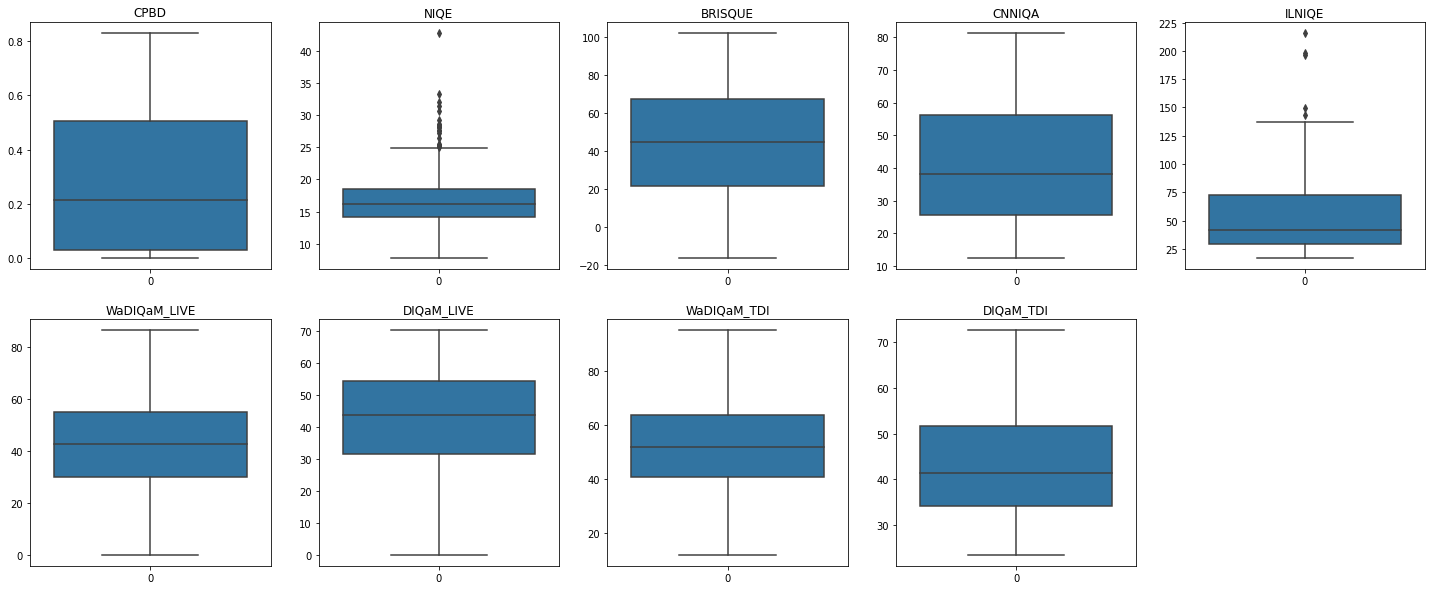

In [ ]:
col_list=NRIQA_df_last.columns[:-2]  #어떤 사진이 이상치에 들어가는지 한번 알아봄 NIQE, ILNIQE 만 이상치가 존재하는 것도 재미있음.
col_list=list(col_list)

plt.figure(figsize=(25,10))
n=1
for i in col_list:
  plt.subplot(2,5,n)
  plt.title(f"{i}")
  sns.boxplot(data=NRIQA_df_last[f'{i}'])
  n+=1
plt.show() 

In [ ]:
col_list=NRIQA_df_last.columns[5:9]
col_list=list(col_list)
for i in col_list : #어떤 사진이 이상치에 들어가는지 한번 알아봄 NIQE, ILNIQE 만 이상치가 존재하는 것도 재미있음.

  print(i, spearmanr(NRIQA_df_last[f"{i}"], dist_MOS_num))


WaDIQaM_LIVE SpearmanrResult(correlation=-0.5951318696064425, pvalue=2.609061513765546e-117)
DIQaM_LIVE SpearmanrResult(correlation=-0.7118149675170315, pvalue=2.4517914246891213e-188)
WaDIQaM_TDI SpearmanrResult(correlation=-0.7159718291312673, pvalue=1.580493494174746e-191)
DIQaM_TDI SpearmanrResult(correlation=-0.5606237323878469, pvalue=1.683564955977567e-101)


In [ ]:
col_list=NRIQA_df_last.columns[5:9]
col_list=list(col_list)
for i in col_list : #어떤 사진이 이상치에 들어가는지 한번 알아봄 NIQE, ILNIQE 만 이상치가 존재하는 것도 재미있음.

  print(pearsonr(NRIQA_df_last[f"{i}"], dist_MOS_num))

(-0.5765188041398804, 1.5060160647687855e-108)
(-0.7046017497472329, 6.213327005474444e-183)
(-0.6957793284401366, 1.5259155080621467e-176)
(-0.5527579500909185, 3.7593481763196236e-98)


FFHQ 데이터 1000개 이미지 추출

In [ ]:
crop_list = pd.read_csv("/content/drive/MyDrive/기업연계프로젝트/crop_list.csv")

In [ ]:
crop_list = crop_list.iloc[:, 5:9] #crop_list 에서 슬라이싱하여 이미지번호만 추출

In [ ]:
lst = crop_list['4']*1000 + crop_list['5']*100 + crop_list['6']*10 + crop_list['7']

In [ ]:
lst=list(lst) # 리스트로 변환
len(lst)

6850

In [ ]:
import json

In [ ]:
with open('/content/drive/MyDrive/24team/ffhq-dataset-v2.json') as json_file:
    meta = json.load(json_file)

In [ ]:
base_path = '/content/drive/MyDrive/24team/'

In [ ]:
ffhq_ref=[os.path.join(base_path, meta[str(i)]["image"]["file_path"]) for i in lst[0:1000]]

In [ ]:
len(ffhq_ref)

1000